### Problem Statement -
We aim to predict property prices using machine learning techniques, exploring algorithms including Decision Tree, Random Forest, Linear Regression, Lasso Regression, and Ridge Regression. The process involves:

### Steps and tasks :

### Step 1: Reading and Understanding the Data

### Step 2 : Data Cleaning and Preparation

### Step 3: Visualizing the data

### Step 3.1 : Visualising Categorical Data
   
### Step 4 : Dummy Variables

### Step 5 : Deriving new features

### Step 6 : Residual Analysis of Model

### Step 7 : Train-Test Split and feature scaling

### Step 8 : Model Building

### Step 9 : Prediction and Evaluation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
label_encoder = LabelEncoder()

In [7]:
print(label_encoder)

LabelEncoder()


In [8]:
#second method of encoding technique 
df["availability"] = label_encoder.fit_transform(df["availability"])
df["area_type"] = label_encoder.fit_transform(df["area_type"])
df["society"] = label_encoder.fit_transform(df["society"])
df["size"] = label_encoder.fit_transform(df["size"])
df["location"] = label_encoder.fit_transform(df["location"])
df["price"] = label_encoder.fit_transform(df["price"])
df["bath"] = label_encoder.fit_transform(df["bath"])
df["balcony"] = label_encoder.fit_transform(df["balcony"])
df["total_sqft"] = label_encoder.fit_transform(df["total_sqft"])

In [9]:
df['size'] = df['size'].fillna(df['size'].mode()[0])

In [10]:
df['location'] = df['location'].fillna(df['location'].mode()[0])

In [11]:
df['society'] = df['society'].fillna(df['society'].mode()[0])

In [12]:
df['bath'] = df['bath'].fillna(df['bath'].mean())

In [13]:
df['balcony'] = df['balcony'].fillna(df['balcony'].mean())

In [14]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,40,419,13,464,70,1,1,392
1,2,80,317,19,2439,1288,4,3,1599
2,0,80,1179,16,2688,514,1,3,1047
3,4,80,757,16,2186,602,2,1,1520
4,4,80,716,13,2688,239,1,1,767


In [15]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   area_type     13320 non-null  int32
 1   availability  13320 non-null  int32
 2   location      13320 non-null  int32
 3   size          13320 non-null  int32
 4   society       13320 non-null  int32
 5   total_sqft    13320 non-null  int32
 6   bath          13320 non-null  int64
 7   balcony       13320 non-null  int64
 8   price         13320 non-null  int64
dtypes: int32(6), int64(3)
memory usage: 624.5 KB


In [17]:
df.corr()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
area_type,1.000000,-0.120165,0.032725,-0.149242,-0.186172,-0.132784,-0.108434,0.067654,-0.102044
availability,-0.120165,1.000000,0.002805,0.090900,0.016054,0.027519,0.005150,0.097955,0.094298
location,0.032725,0.002805,1.000000,0.006606,-0.050938,-0.000024,0.005297,0.002792,0.039886
size,-0.149242,0.090900,0.006606,1.000000,0.115643,-0.063268,0.536498,0.298106,0.565330
society,-0.186172,0.016054,-0.050938,0.115643,1.000000,0.035172,0.067313,-0.052691,0.018155
total_sqft,-0.132784,0.027519,-0.000024,-0.063268,0.035172,1.000000,0.150262,-0.000079,0.067016
bath,-0.108434,0.005150,0.005297,0.536498,0.067313,0.150262,1.000000,0.344028,0.412789
balcony,0.067654,0.097955,0.002792,0.298106,-0.052691,-0.000079,0.344028,1.000000,0.262571
price,-0.102044,0.094298,0.039886,0.565330,0.018155,0.067016,0.412789,0.262571,1.000000


In [18]:
df.fillna(df['price']).mean()

area_type          2.950150
availability      71.081156
location         672.659009
size              14.812913
society         1906.121547
total_sqft       762.983258
bath               1.785135
balcony            1.694820
price           1138.128453
dtype: float64

In [19]:
df.describe()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000,13320.000000
mean,2.950150,71.081156,672.659009,14.812913,1906.121547,762.983258,1.785135,1.694820,1138.128453
std,1.571455,18.513172,365.024806,4.490614,865.637849,630.502696,1.819158,0.944453,517.686451
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,80.000000,397.000000,13.000000,1247.750000,239.000000,1.000000,1.000000,740.000000
50%,4.000000,80.000000,654.000000,16.000000,2210.000000,554.000000,1.000000,2.000000,1244.000000
75%,4.000000,80.000000,999.000000,16.000000,2688.000000,1208.000000,2.000000,2.000000,1599.000000
max,4.000000,80.000000,1305.000000,31.000000,2688.000000,2116.000000,19.000000,4.000000,1993.000000


In [20]:
df['price'].value_counts()

1282    310
1105    302
883     275
1002    270
593     240
       ... 
1824      1
858       1
1367      1
206       1
1883      1
Name: price, Length: 1994, dtype: int64

In [21]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

## Extract Data Analysis

<Axes: >

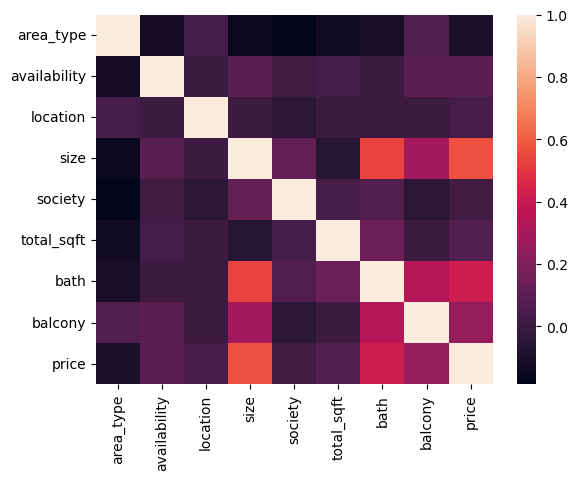

In [22]:
sns.heatmap(df.corr())

<Axes: ylabel='count'>

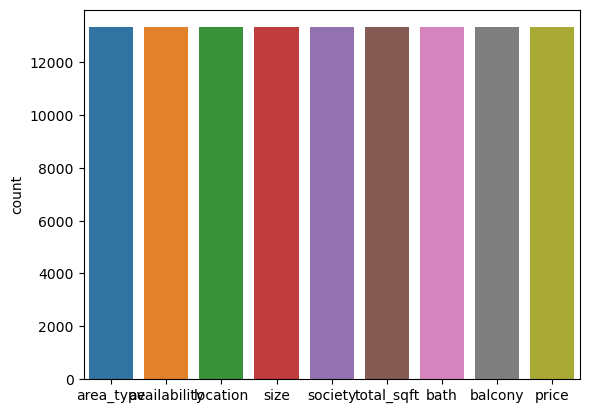

In [23]:
sns.countplot(df)

<Axes: >

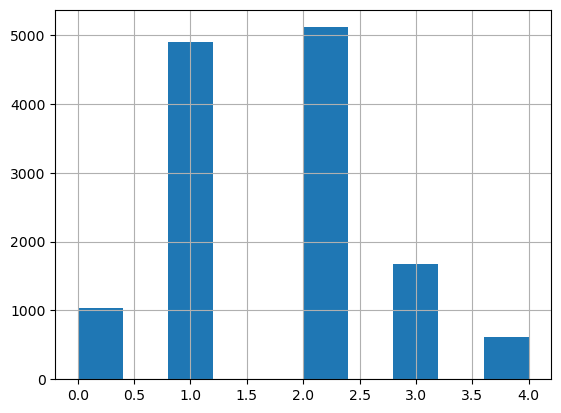

In [24]:
df['balcony'].hist()

<Axes: >

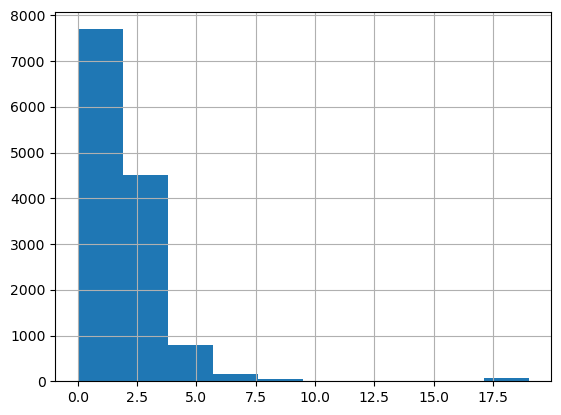

In [25]:
df['bath'].hist()

<Axes: >

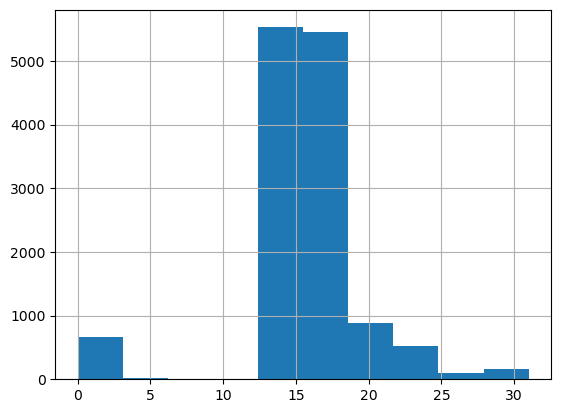

In [26]:
df['size'].hist()

In [27]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,40,419,13,464,70,1,1,392
1,2,80,317,19,2439,1288,4,3,1599
2,0,80,1179,16,2688,514,1,3,1047
3,4,80,757,16,2186,602,2,1,1520
4,4,80,716,13,2688,239,1,1,767


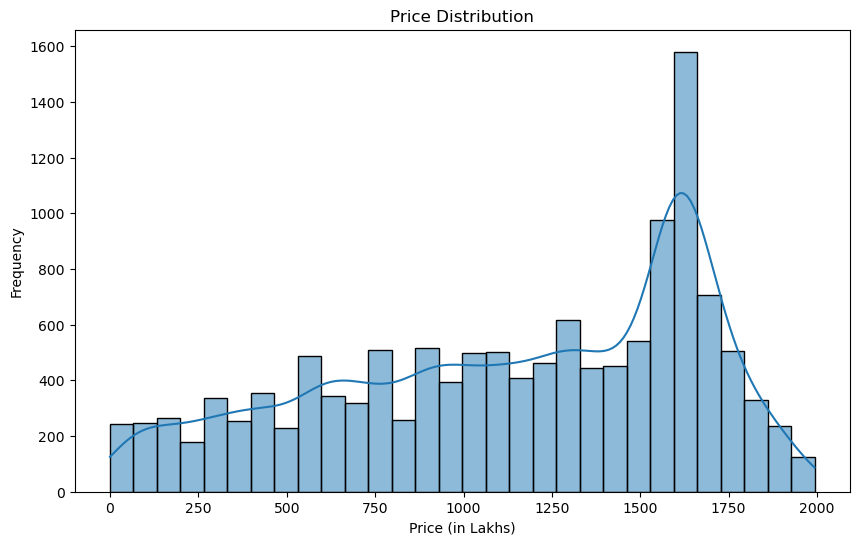

In [28]:
# Histogram of Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price (in Lakhs)')
plt.ylabel('Frequency')
plt.show()

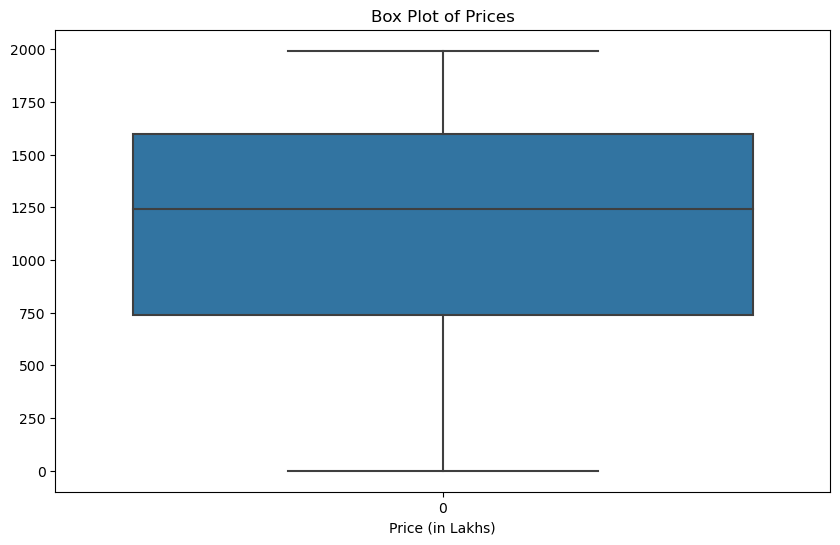

In [29]:
# Box Plot of Prices
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Box Plot of Prices')
plt.xlabel('Price (in Lakhs)')
plt.show()

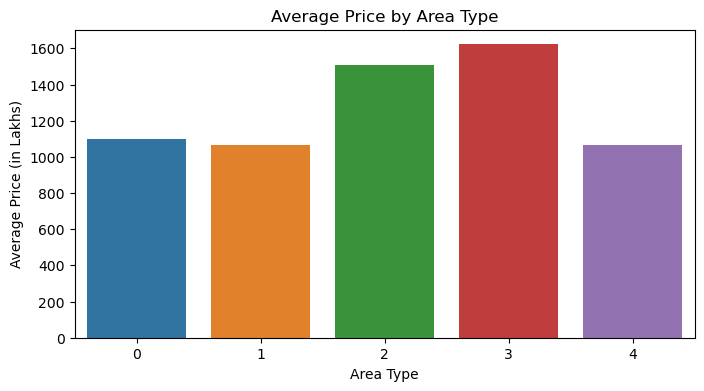

In [30]:
# Bar Chart for Average Price by Area Type
plt.figure(figsize=(8, 4))
sns.barplot(x='area_type', y='price', data=df, ci=None)
plt.title('Average Price by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Average Price (in Lakhs)')
plt.show()

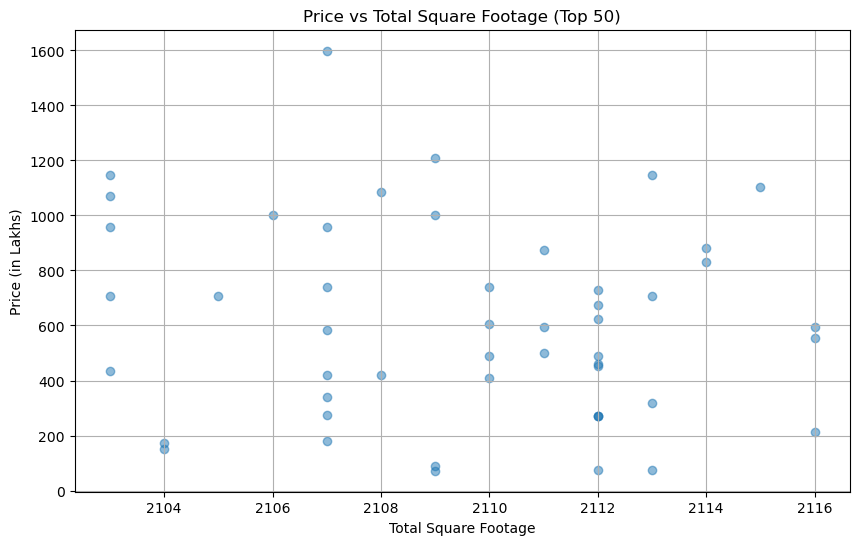

In [31]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df = df.dropna(subset=['total_sqft', 'price'])

# Sort the DataFrame by 'total_sqft' and take the top 50 entries
top_50_df = df.nlargest(50, 'total_sqft')

# Scatter Plot of Price vs Total Square Footage for top 50 entries
plt.figure(figsize=(10, 6))
plt.scatter(top_50_df['total_sqft'], top_50_df['price'], alpha=0.5)
plt.title('Price vs Total Square Footage (Top 50)')
plt.xlabel('Total Square Footage')
plt.ylabel('Price (in Lakhs)')
plt.grid(True)
plt.show()

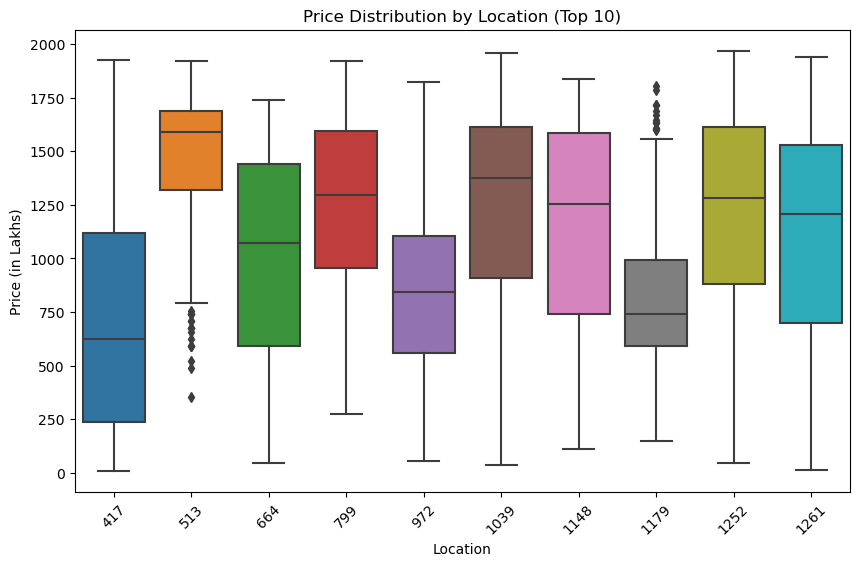

In [32]:
# Bar Chart for Average Price by Location (Top 10 Locations)
top_locations = df['location'].value_counts().nlargest(10).index
df_top_locations = df[df['location'].isin(top_locations)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='price', data=df_top_locations)
plt.title('Price Distribution by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

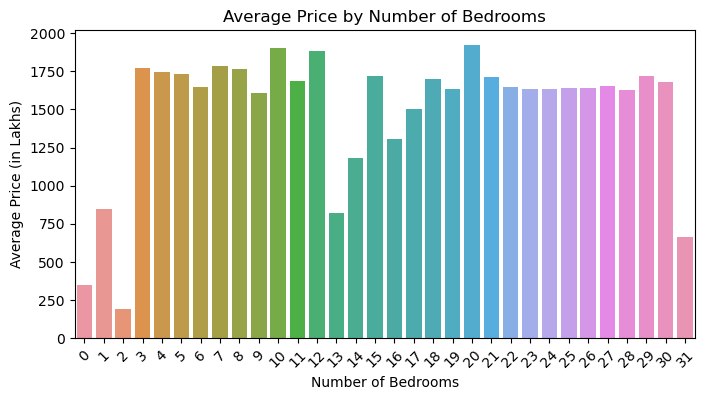

In [33]:
# Bar Chart for Average Price by Number of Bedrooms
plt.figure(figsize=(8, 4))
sns.barplot(x='size', y='price', data=df, ci=None)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

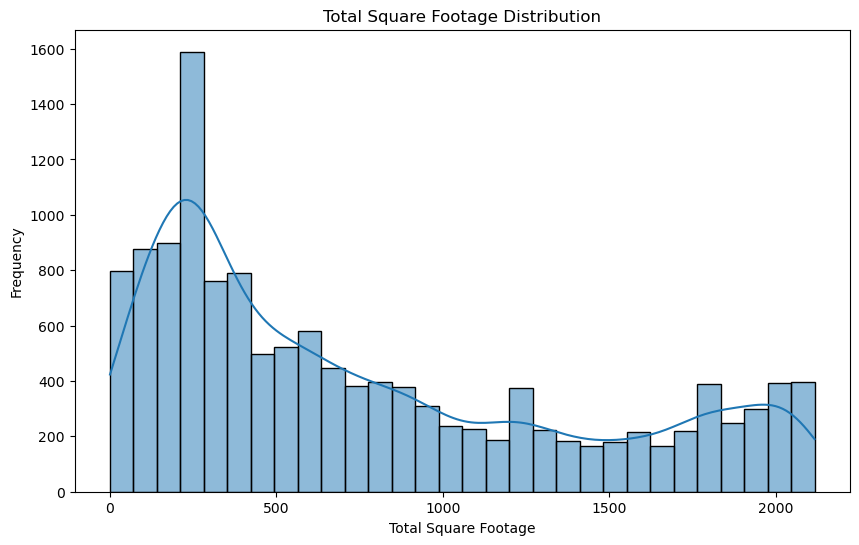

In [34]:
# Histogram of Total Square Footage
plt.figure(figsize=(10, 6))
sns.histplot(df['total_sqft'], kde=True, bins=30)
plt.title('Total Square Footage Distribution')
plt.xlabel('Total Square Footage')
plt.ylabel('Frequency')
plt.show()

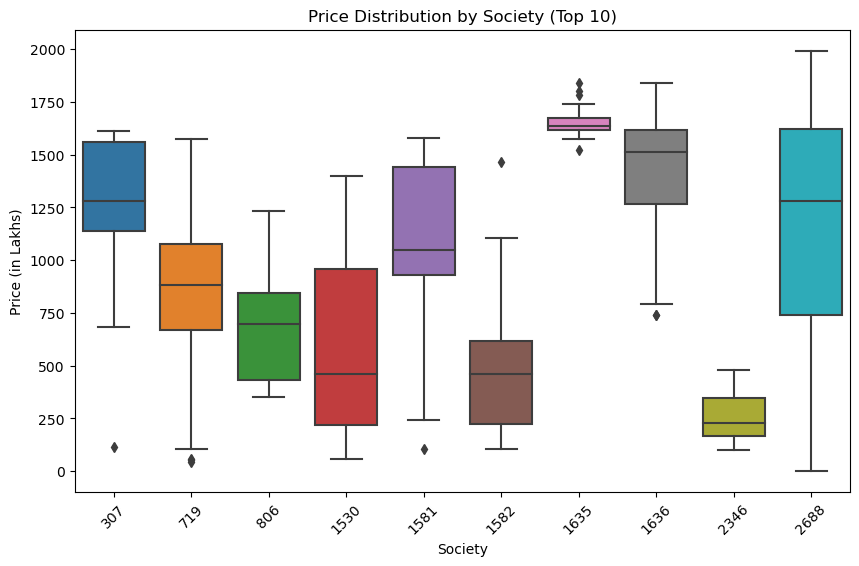

In [35]:
# Bar Chart for Average Price by Society (Top 10 Societies)
top_societies = df['society'].value_counts().nlargest(10).index
df_top_societies = df[df['society'].isin(top_societies)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='society', y='price', data=df_top_societies)
plt.title('Price Distribution by Society (Top 10)')
plt.xlabel('Society')
plt.ylabel('Price (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

<Axes: >

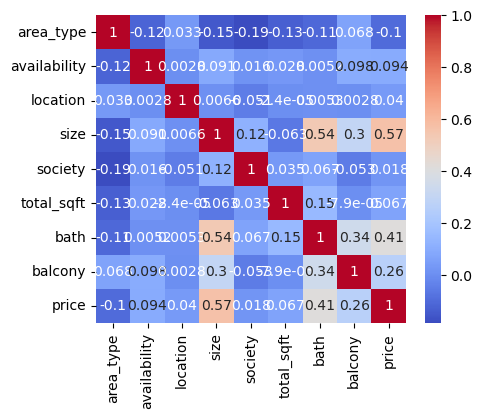

In [36]:
corr = df.corr()
#plot the heat map
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [37]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,4,40,419,13,464,70,1,1,392
1,2,80,317,19,2439,1288,4,3,1599
2,0,80,1179,16,2688,514,1,3,1047
3,4,80,757,16,2186,602,2,1,1520
4,4,80,716,13,2688,239,1,1,767


In [38]:
df.rename(columns={'price': 'main price'}, inplace=True)

In [39]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,main price
0,4,40,419,13,464,70,1,1,392
1,2,80,317,19,2439,1288,4,3,1599
2,0,80,1179,16,2688,514,1,3,1047
3,4,80,757,16,2186,602,2,1,1520
4,4,80,716,13,2688,239,1,1,767


In [40]:
df.corr()

,area_type,availability,location,size,society,total_sqft,bath,balcony,main price
area_type,1.000000,-0.120165,0.032725,-0.149242,-0.186172,-0.132784,-0.108434,0.067654,-0.102044
availability,-0.120165,1.000000,0.002805,0.090900,0.016054,0.027519,0.005150,0.097955,0.094298
location,0.032725,0.002805,1.000000,0.006606,-0.050938,-0.000024,0.005297,0.002792,0.039886
size,-0.149242,0.090900,0.006606,1.000000,0.115643,-0.063268,0.536498,0.298106,0.565330
society,-0.186172,0.016054,-0.050938,0.115643,1.000000,0.035172,0.067313,-0.052691,0.018155
total_sqft,-0.132784,0.027519,-0.000024,-0.063268,0.035172,1.000000,0.150262,-0.000079,0.067016
bath,-0.108434,0.005150,0.005297,0.536498,0.067313,0.150262,1.000000,0.344028,0.412789
balcony,0.067654,0.097955,0.002792,0.298106,-0.052691,-0.000079,0.344028,1.000000,0.262571
main price,-0.102044,0.094298,0.039886,0.565330,0.018155,0.067016,0.412789,0.262571,1.000000


In [41]:
df.dtypes

area_type       int32
availability    int32
location        int32
size            int32
society         int32
total_sqft      int32
bath            int64
balcony         int64
main price      int64
dtype: object

### Model Training and Testing

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle
#input data
X = df.drop(columns=['balcony'])
#output data
Y = df['balcony']
#split the data for train and test 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [43]:
#Decision Tree
model = DecisionTreeRegressor()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy:", model.score(x_test, y_test)*100)

Decision Tree Accuracy: -33.371470508981105


In [44]:
model.fit(x_train.values, y_train.values)

DecisionTreeRegressor()

In [45]:
#print metric to get performance 
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  -31.80453696084733


### RandomForestRegressor

In [46]:
#RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train.values, y_train.values)
print("RandomForest Accuracy:", model.score(x_test, y_test)*100)

RandomForest Accuracy: 28.396086923428033


In [47]:
model.fit(x_train.values, y_train.values)

RandomForestRegressor()

In [48]:
#print metric to get performance 
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  28.43561510961604


In [49]:
lr = LinearRegression ( normalize = True )

TypeError: LinearRegression.__init__() got an unexpected keyword argument 'normalize'

### LinearRegression

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [51]:
# You can also access the coefficients and intercept of the linear regression model
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)

Coefficients: [ 7.33351296e-02  4.61006569e-03 -3.62408194e-05  2.70675085e-02
 -6.85033000e-05 -2.95496675e-05  1.30427172e-01  1.83267475e-04]
Intercept: 0.49007157097926934


### Lasso

In [53]:
from sklearn.linear_model import Lasso
ls = Lasso()
ls.fit(x_train, y_train)

Lasso()

In [54]:
y_pred = ls.predict(x_test)
# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.8079075063618938


In [55]:
# You can also access the coefficients and intercept of the Lasso regression model
print("Intercept:", ls.intercept_)

Intercept: 1.2538942398926398


### Using RidgeRegression

In [56]:
ridge = Ridge()

In [57]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.1)
model.fit(x_train, y_train)

Ridge(alpha=0.1)

In [58]:
# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.7178667096808107


In [59]:
# You can also access the coefficients and intercept of the Ridge regression model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 7.33347704e-02  4.61005950e-03 -3.62408103e-05  2.70675836e-02
 -6.85033963e-05 -2.95495027e-05  1.30426576e-01  1.83267872e-04]
Intercept: 0.4900726314050272


In [60]:
#save the update model
filename = 'save_model.sav'
try:
    with open(filename, 'wb')as file:
        pickle.dump(model, file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved successfully.
